Chapter 20
# 可视化 Dirichlet 分布
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包

import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
from matplotlib import cm
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义可视化函数

In [3]:

def visualize(alpha_array, mesh_only = True):
    
    # 生成网格化数据
    theta_1_array = theta_2_array = np.linspace(0,1,401)

    tt1, tt2 = np.meshgrid(theta_1_array, theta_2_array)
    tt3 = 1 - tt1 - tt2

    # Points = np.column_stack([tt1.ravel(), tt2.ravel(), tt3.ravel()])
    # Points_filtered = Points[Points[:,2]>=0, :]
    # pdf = dirichlet.pdf(Points_filtered.T, alpha_array)
    
    PDF_array = []

    for t_1_idx, t_2_idx in zip(tt1.ravel(), tt2.ravel()):

        t_3_idx = 1 - t_1_idx - t_2_idx
        if t_3_idx < 0.005:
            PDF_idx = np.nan
        else:
            PDF_idx = dirichlet.pdf([t_1_idx, t_2_idx, t_3_idx], alpha_array)

        PDF_array.append(PDF_idx)
        
    PDF_FF = np.reshape(PDF_array, tt1.shape)
    
    # 可视化
    
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    
    norm_plt = plt.Normalize(np.nanmin(PDF_FF), np.nanmax(PDF_FF))
    colors = cm.RdYlBu_r(norm_plt(PDF_FF))

    surf = ax.plot_surface(tt1, tt2, tt3, 
                           facecolors=colors,
                           linewidth=0.25, shade=False,
                           cstride = 10,rstride = 10)
    if mesh_only:
        
        surf.set_facecolor((0,0,0,0))
    
    ax.view_init(azim=30, elev=30)
    ax.set_proj_type('ortho')
    ax.set_box_aspect([1,1,1])
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_zlim((0,1))
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel(r'$\theta_3$')
    ax.set_xticks((0,1))
    ax.set_yticks((0,1))
    ax.set_zticks((0,1))
    ax.grid(False)
    title = '_'.join(str(v) for v in alpha_array)
    title = 'alphas_' + title
    if mesh_only:
        title = title + '_mesh_only'

    fig.savefig('Figures/' + title + '.svg', format='svg')


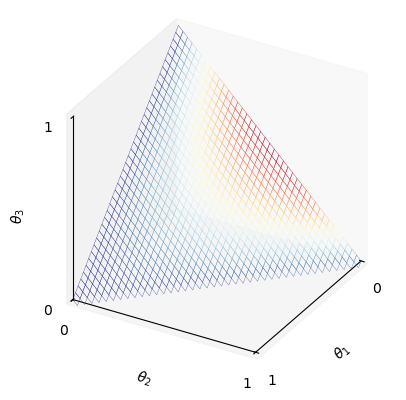

In [4]:
alpha_array = [1, 2, 2]
visualize(alpha_array, True)

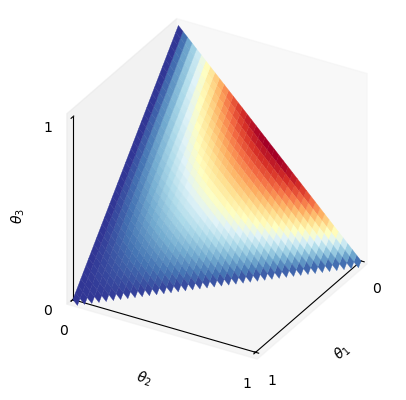

In [5]:
alpha_array = [1, 2, 2]
visualize(alpha_array, False)

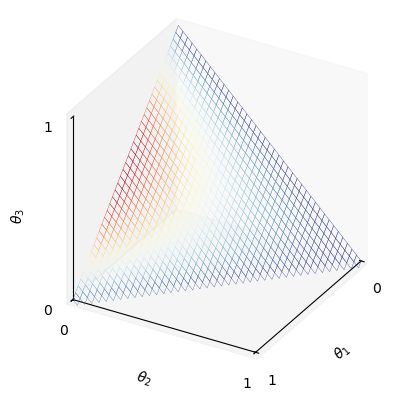

In [13]:
alpha_array = [2, 1, 2]
visualize(alpha_array, True)

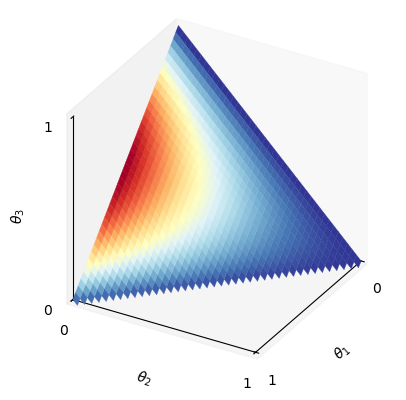

In [7]:
alpha_array = [2, 1, 2]
visualize(alpha_array, False)

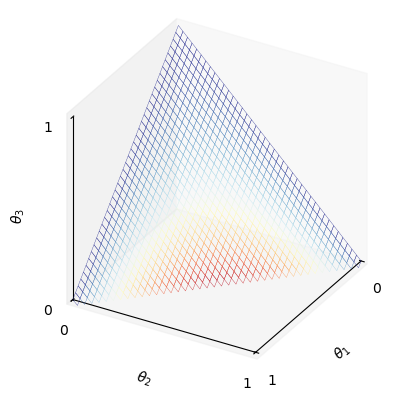

In [8]:
alpha_array = [2, 2, 1]
visualize(alpha_array, True)

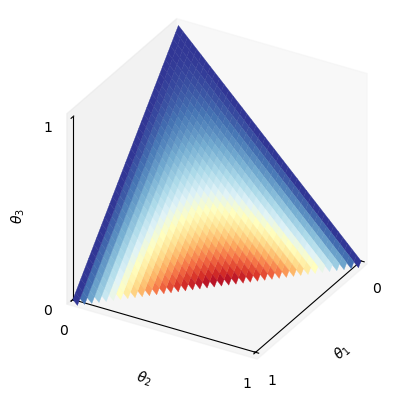

In [9]:
alpha_array = [2, 2, 1]
visualize(alpha_array, False)

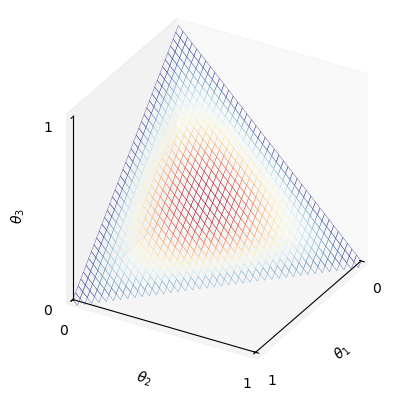

In [10]:
alpha_array = [2, 2, 2]
visualize(alpha_array, True)

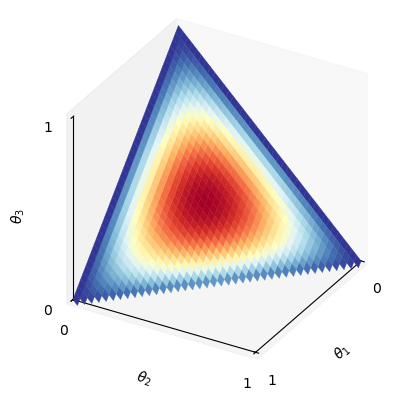

In [11]:
alpha_array = [2, 2, 2]
visualize(alpha_array, False)

In [12]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023